# Regresion
 La regresión es una técnica estadística utilizada para modelar la relación
 entre una variable dependiente (respuesta) y una o más variables
 independientes (predictores). Se busca entender cómo los cambios en las
 variables independientes afectan a la variable dependiente.

## Algoritmos de Regresión Comunes:
 Algunos algoritmos de regresión comunes incluyen
 regresión lineal, regresión polinomial y regresión de
 vecinos más cercanos (KNN).

###  Creación de un Conjunto de Datos con Variables Independientes y Dependientes:

In [ ]:
import numpy as np
horas_estudio = np.array([1,3,4,5,6])
calificacion_examen = np.array([65, 70, 75, 80, 85])

In [ ]:
def calcula_correlacion(x, y):
    correlacion = np.corrcoef(x, y)[0, 1]
    return correlacion
correlacion = calcula_correlacion(horas_estudio, calificacion_examen)
print("la correlacion enre horas de estudio y calificacion del examen es ", correlacion)

la correlacion enre horas de estudio y calificacion del examen es  0.9863939238321436


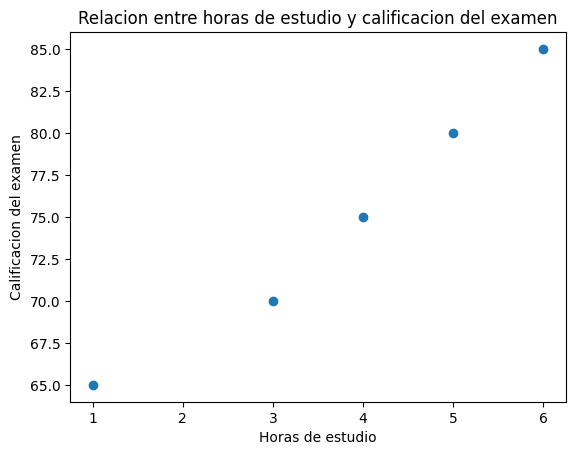

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(horas_estudio, calificacion_examen)
plt.xlabel("Horas de estudio")
plt.ylabel("Calificacion del examen")
plt.title("Relacion entre horas de estudio y calificacion del examen")
plt.show()

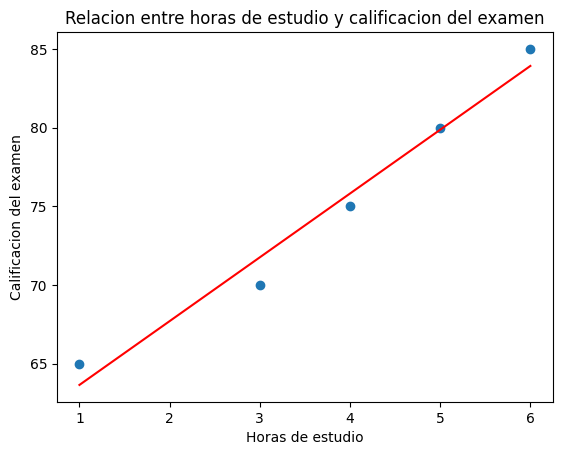

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
modelo_regresion.fit(horas_estudio.reshape(-1, 1), calificacion_examen)
plt.scatter(horas_estudio, calificacion_examen)
plt.plot(horas_estudio, modelo_regresion.predict(horas_estudio.reshape(-1, 1)), color="red")
plt.xlabel("Horas de estudio")
plt.ylabel("Calificacion del examen")
plt.title("Relacion entre horas de estudio y calificacion del examen")
plt.show()

## Model Lineal y aplicacion en la prediccion

 La Regresión Lineal es un modelo estadístico que busca establecer una
 relación lineal entre una variable dependiente y una o más variables
 independientes. Se representa mediante una ecuación de la forma:
 y=β0+β1x1+β2x2+...+βnxn+ϵ\

Error cuadratico medio (MSE): 4197.847926121515


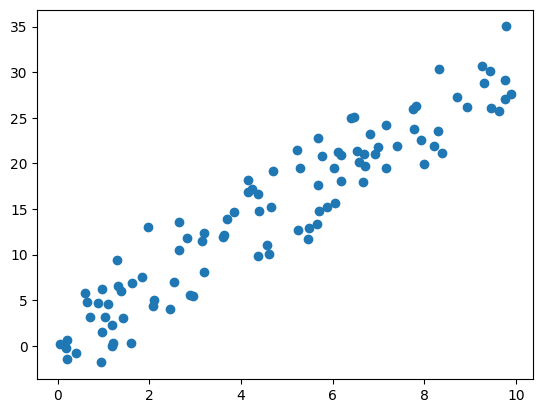

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#generar datos ficticios
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 3
plt.scatter(X, y)

#dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#entrenando el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadratico medio (MSE):", mse)

In [ ]:
# definir la funcion para el metodo de minimos cuadrados
def least_squares(x, y):
  X = np.c_[np.ones(len(x)), x]
  beta = np.linalg.inv(X.T @ X) @ X.T @ y
  return beta

In [ ]:
#usar la funcion a para ajustar el modelo
coefficients = least_squares(X, y)
print("Coeficientes del modelo: ", coefficients)

Coeficientes del modelo:  [0.66645323 2.98108051]


## Interpretacion de la pendiente y la interseccion

In [ ]:
#extraer los coeficionetes de la pendiente e interseccion del modelo de regresin lineal
intercept = model.intercept_
coefficients = model.coef_
print("Interseccion: ", intercept)
print("Pendiente: ", coefficients)

Interseccion:  0.6190205661343011
Pendiente:  [2.99415546]


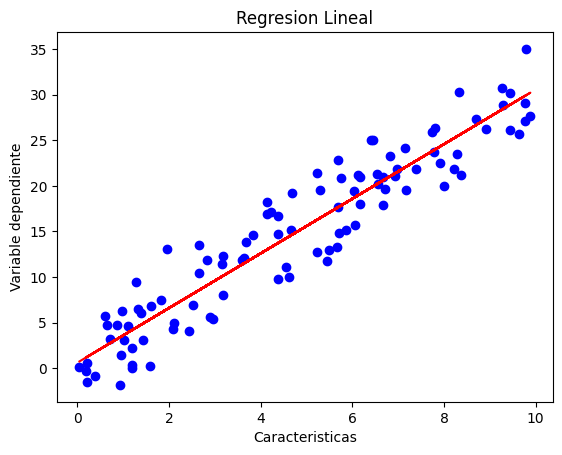

In [ ]:
#graficar la linea de regresion
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color="red")
plt.xlabel("Caracteristicas")
plt.ylabel("Variable dependiente")
plt.title("Regresion Lineal")
plt.show()

## Refresion Polinomial

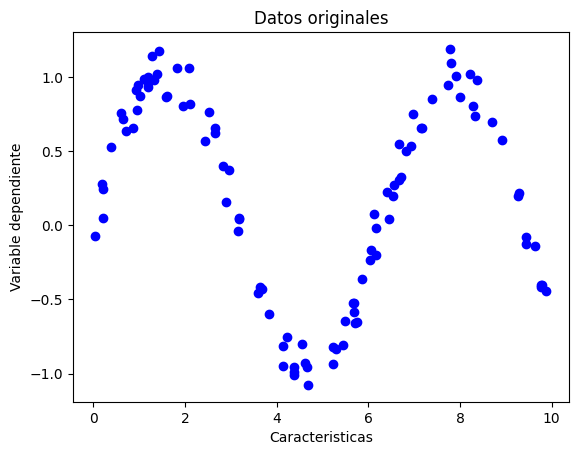

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#generar datos ficticios
np.random.seed(0)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

#graficar los resultados
plt.scatter(X, y, color='blue')
plt.xlabel("Caracteristicas")
plt.ylabel("Variable dependiente")
plt.title("Datos originales")
plt.show()

#dividir los datos en conjuntos de entrenamineto y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Grado del polinomio:  1
Error cuadratico medio:  0.4528190442483693



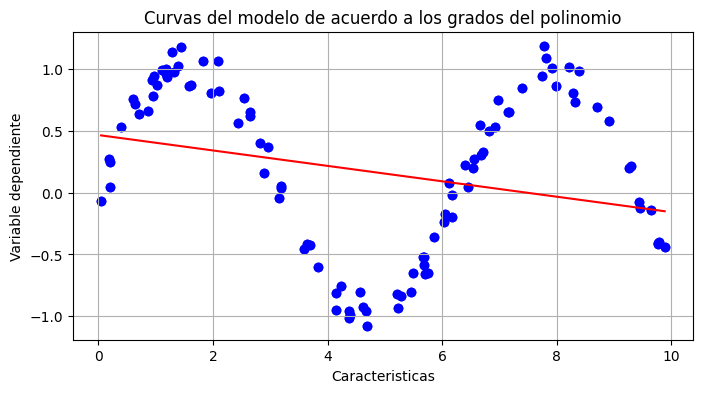

Grado del polinomio:  2
Error cuadratico medio:  0.4089585371554049



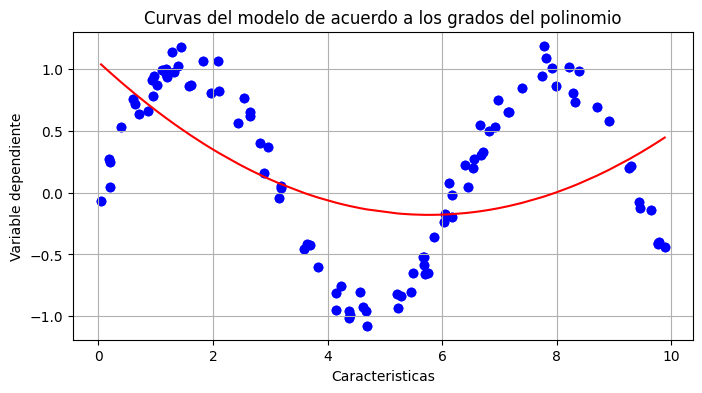

Grado del polinomio:  3
Error cuadratico medio:  0.42007847154221556



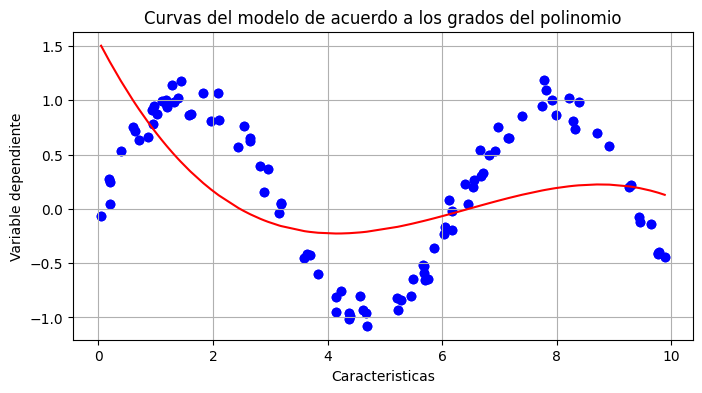

Grado del polinomio:  4
Error cuadratico medio:  0.041551189335714986



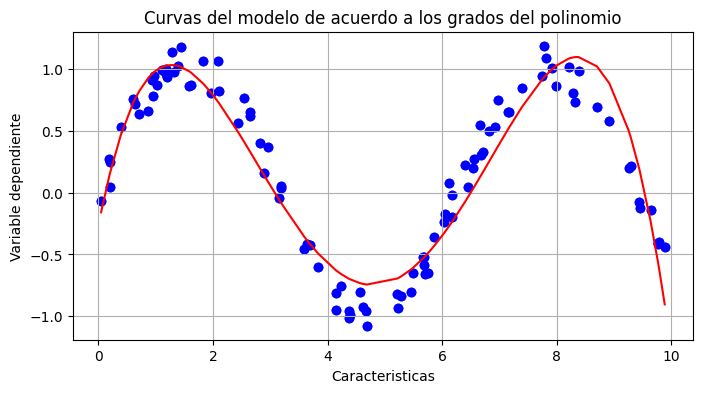

Grado del polinomio:  5
Error cuadratico medio:  0.04954307393669039



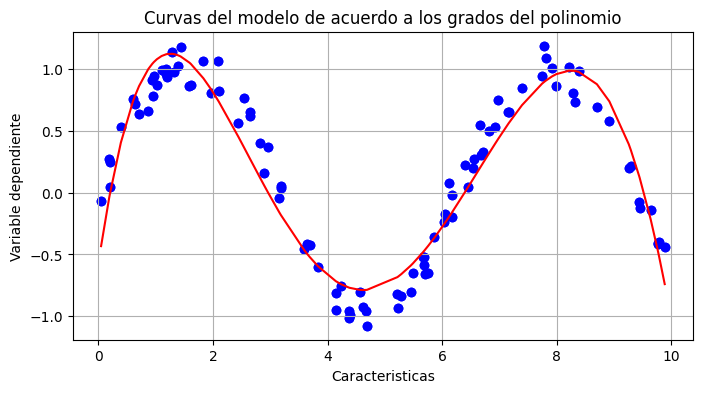

Grado del polinomio:  6
Error cuadratico medio:  0.012109586698538021



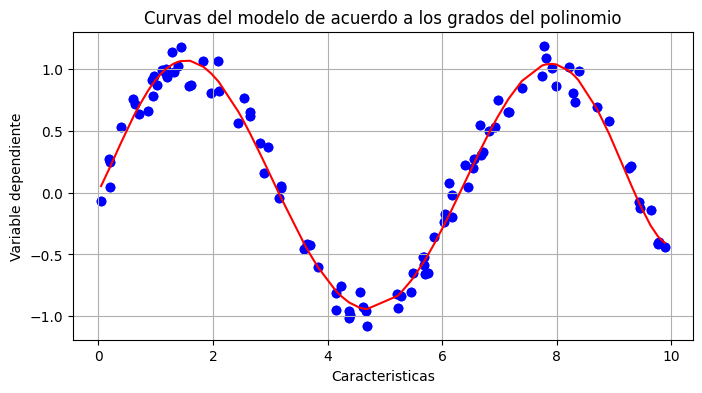

Grado del polinomio:  7
Error cuadratico medio:  0.012430837425974695



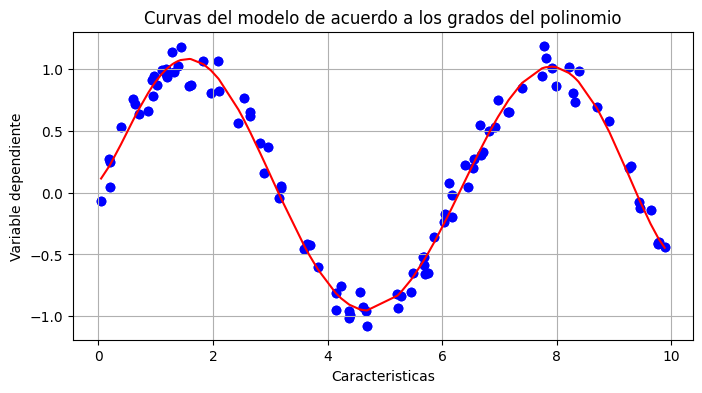

Grado del polinomio:  8
Error cuadratico medio:  0.008657353601277975



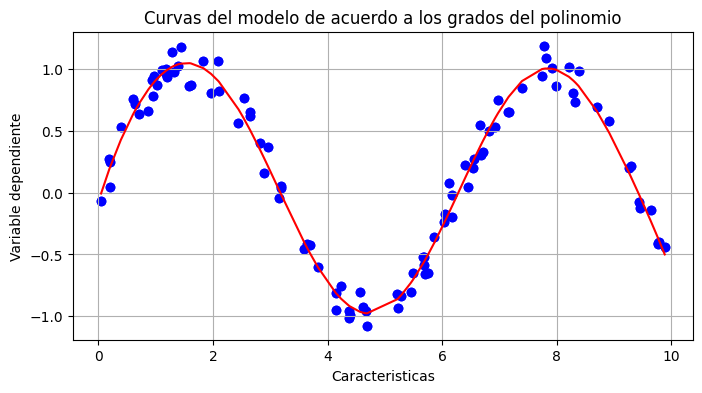

Grado del polinomio:  9
Error cuadratico medio:  0.007498655787298502



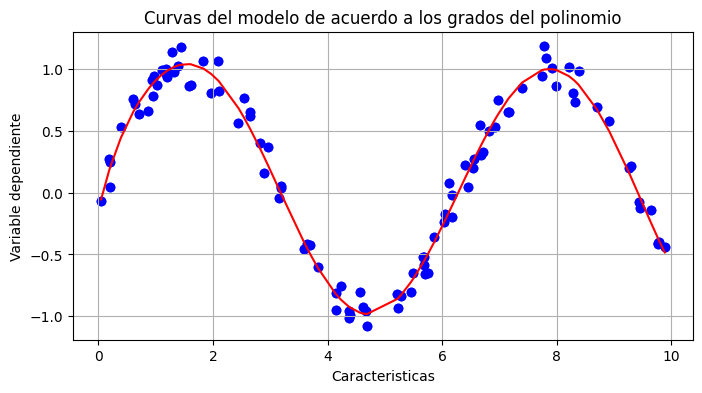

In [ ]:
#ajustar diferentes grados de polinomios y calcular el error cuadratico medio en el conjunto de prueba
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_list = []

for degree in degrees:
  polynomial_features = PolynomialFeatures(degree=degree)
  X_train_poly = polynomial_features.fit_transform(X_train)
  X_test_poly = polynomial_features.transform(X_test)

  model = LinearRegression()
  model.fit(X_train_poly, y_train)

  y_pred = model.predict(X_test_poly)

  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  print("Grado del polinomio: ", degree)
  print("Error cuadratico medio: ", mse)
  print()
  #graficar cada modelo de acuerdo al grado del polinimio
  plt.figure(figsize=(8, 4))
  plt.scatter(X, y, color='blue')
  plt.plot(X, model.predict(polynomial_features.fit_transform(X)), color='red')
  plt.scatter(X, y, color='blue', label='Datos originales')
  plt.xlabel("Caracteristicas")
  plt.ylabel("Variable dependiente")
  plt.title("Curvas del modelo de acuerdo a los grados del polinomio")
  plt.grid(True)
  plt.show()




## Regresion Logaritmica
La Regresión Logarítmica es una técnica utilizada para modelar relaciones
 no lineales que exhiben un crecimiento o decrecimiento logarítmico en lugar
 de un crecimiento lineal. Este modelo es especialmente útil cuando los
 datos muestran un patrón de crecimiento o decrecimiento que no puede ser
 capturado adecuadamente por modelos lineales tradicionales.

<ipython-input-44-0d8fc412d6c2>:6: RuntimeWarning: divide by zero encountered in log
  y = 2 * np.log(X) + np.random.normal(0, 0.2, 100) #funcion logaritmica con ruido gausaniano


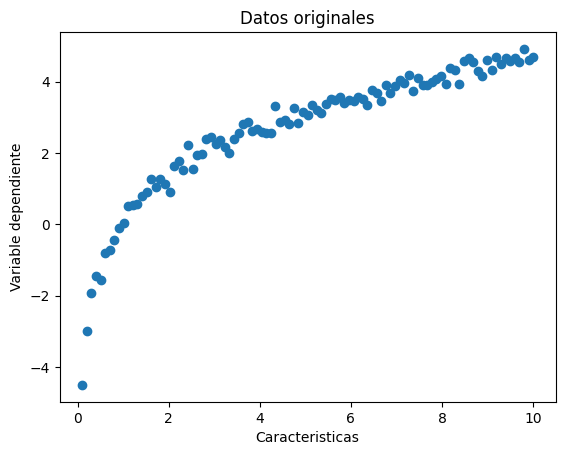

In [ ]:
import numpy as np

#generar datos ficticios con una relacion logaritmica creciente
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * np.log(X) + np.random.normal(0, 0.2, 100) #funcion logaritmica con ruido gausaniano

#graficar la funcion
plt.scatter(X, y)
plt.xlabel("Caracteristicas")
plt.ylabel("Variable dependiente")
plt.title("Datos originales")
plt.show()


Aplicacion de la Regresion Logaritmica

<ipython-input-48-d5ac6a5e8f15>:5: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


Text(0.5, 1.0, 'Curva ajustada')

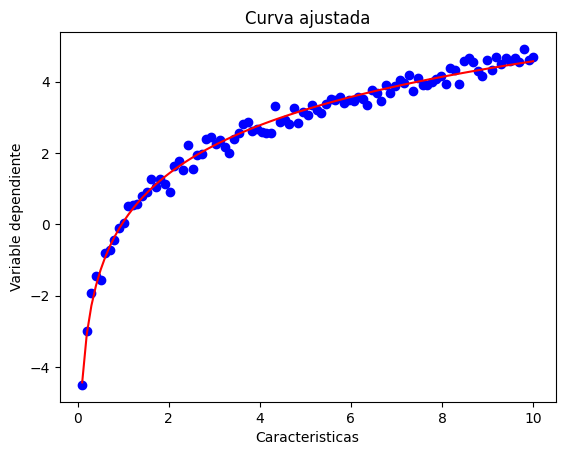

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def logarithmic_function(x, a, b):
  return a * np.log(x) + b

#ajustar la curva logaritmica a los datos
# Filter out X and y values where X is 0 to avoid log(0)
X_filtered = X[X > 0]
y_filtered = y[X > 0]

params, _ = curve_fit(logarithmic_function, X_filtered, y_filtered)
a, b = params

#graficar la curva ajustada
plt.scatter(X, y, color='blue', label='Datos originales')

plt.plot(X, logarithmic_function(X, a, b), color='red', label='Curva ajustada')
plt.xlabel("Caracteristicas")
plt.ylabel("Variable dependiente")
plt.title("Curva ajustada")

In [ ]:
#interpretacion de los coeficientes
print("Coeficiente a: ", a)
print("Coeficiente b: ", b)
print("Interpretacion:")
print("el coeficiente 'a' representa el crecimiento o decrecimiento logaitmico de la variable dependiente por cada unidad de cambio en la variable independiente")
print("el coeficiente 'b' representa el intercepto de la curva logaritmica")

Coeficiente a:  1.9606064129414933
Coeficiente b:  0.0611124096199962
Interpretacion:
el coeficiente 'a' representa el crecimiento o decrecimiento logaitmico de la variable dependiente por cada unidad de cambio en la variable independiente
el coeficiente 'b' representa el intercepto de la curva logaritmica


Ejemplo de aplicacion en economia

In [ ]:
#generar datos ficticios para el crecimiento del PIB en funcion del tiempo
X_economic = np.linspace(1, 10, 100)
y_economic = 4 * np.log(X_economic) + np.random.normal(0, 0.2, 100)

#Aplicar el mismo procedimiento de ajuste de curva logaritmica
params_economic, _ = curve_fit(logarithmic_function, X_economic, y_economic)

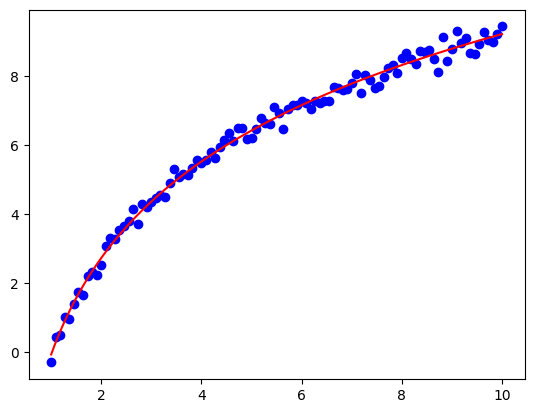

In [ ]:
#graficar la cuva y el modelo
plt.scatter(X_economic, y_economic, color='blue', label='Datos originales')
plt.plot(X_economic, logarithmic_function(X_economic, *params_economic), color='red', label='Curva ajustada')

## Regresion Logistica
Este es un algoritmo de aprendizaje supervisado
 utilizado para la clasificación binaria, es decir,
 cuando el objetivo es predecir una variable
 categórica que puede tomar dos valores, como "sí"
 o "no", "positivo" o "negativo", "enfermo" o "sano",
 entre otros. A pesar de su nombre, la Regresión
 Logística se utiliza para problemas de
 clasificación, no de regresión

In [ ]:
#implementacind e regresion logistica desde cero

import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
  def __init__(self, learning_rate=0.01, num_iterations=1000):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.weights = None
    self.bias = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))


  def fit(self, X, y):
    num_samples, num_features = X.shape
    self.weights = np.zeros(num_features)
    self.bias = 0

    #gradiante descediente

    for _ in range(self.num_iterations):
      linear_model = np.dot(X, self.weights) + self.bias
      predictions = self.sigmoid(linear_model)

      #calculo del gradiante
      dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
      db = (1 / num_samples) * np.sum(predictions - y)

      #actualizacion de los pesos y el sesgo
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(linear_model)
    return np.round(y_predicted)

Prueba de implementacion de regresion logistica

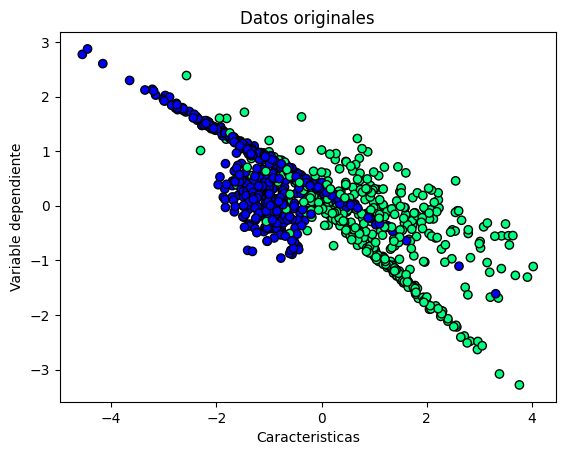

Accuracy:  0.865


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

#dividir datos en conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#crear y entrenar el modelo de regresion logistica
model = LogisticRegression()
model.fit(X_train, y_train)

#predecir el conjunto de prueba
y_pred = model.predict(X_test)

#graficar el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
plt.xlabel("Caracteristicas")
plt.ylabel("Variable dependiente")
plt.title("Datos originales")
plt.show()


#evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy con sklearn:  0.88


Text(0.5, 1.0, 'Datos originales')

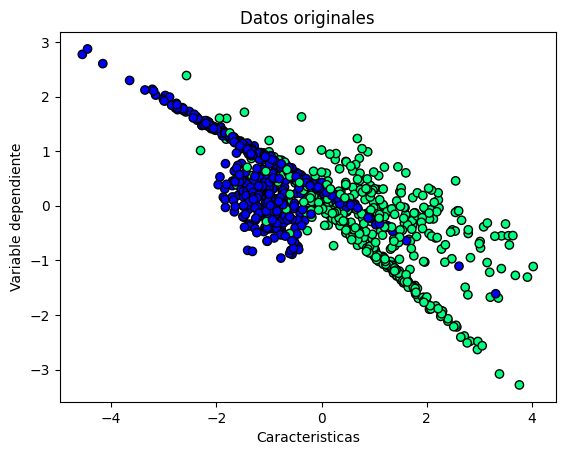

In [ ]:
#comparacion con sklearn
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

#crear y entrenar el modelo de regresion logistica
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)

#predecir el conjunto de prueba
sklearn_y_pred = sklearn_model.predict(X_test)

#calcular precicion
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("Accuracy con sklearn: ", sklearn_accuracy)
#graficar
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
plt.xlabel("Caracteristicas")
plt.ylabel("Variable dependiente")
plt.title("Datos originales")

# Algoritmos de Agrupamiento
El agrupamiento es una técnica de aprendizaje no
 supervisado que consiste en dividir un conjunto
 de datos en grupos o clusters, donde los
 elementos dentro de un mismo grupo son más
 similares entre sí que con los elementos de otros
 grupos. Esta técnica es fundamental en el
 aprendizaje no supervisado porque permite
 descubrir patrones y estructuras ocultas en los
 datos sin la necesidad de etiquetas previas.

## K-Means
 K-Means es un algoritmo de agrupamiento que divide un conjunto de datos
 en k grupos o clusters. El proceso es el siguiente:
 1.
 2.
 3.
 El proceso comienza con la selección aleatoria de k centroides, que son
 los puntos representativos de cada cluster.
Luego, se asigna cada punto de datos al centroide más cercano,
 formando así los clusters.
A continuación, se recalculan los centroides como el promedio de los
 puntos dentro de cada cluster.

Nota:  Este proceso se repite iterativamente hasta que los
 centroides no cambian significativamente o se alcanza
 un número máximo de iteraciones. **texto en negrita**

In [ ]:
#Ejemplo de aplicacion
import numpy as np
import matplotlib.pyplot as plt
#Generar datos aleatorios con dos caracteristicas para la demostracion
np.random.seed(42)
X = np.random.rand(100, 2)
print('Datos generados aleatoriamente')
print(X)

Datos generados aleatoriamente
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]
 [0.61185289 0.13949386]
 [0.29214465 0.36636184]
 [0.45606998 0.78517596]
 [0.19967378 0.51423444]
 [0.59241457 0.04645041]
 [0.60754485 0.17052412]
 [0.06505159 0.94888554]
 [0.96563203 0.80839735]
 [0.30461377 0.09767211]
 [0.68423303 0.44015249]
 [0.12203823 0.49517691]
 [0.03438852 0.9093204 ]
 [0.25877998 0.66252228]
 [0.31171108 0.52006802]
 [0.54671028 0.18485446]
 [0.96958463 0.77513282]
 [0.93949894 0.89482735]
 [0.59789998 0.92187424]
 [0.0884925  0.19598286]
 [0.04522729 0.32533033]
 [0.38867729 0.27134903]
 [0.82873751 0.35675333]
 [0.28093451 0.54269608]
 [0.14092422 0.80219698]
 [0.07455064 0.98688694]
 [0.77224477 0.19871568]
 [0.00552212 0.81546143]
 [0.70685734 0.72900717]
 [0.77127035 0.0740

In [ ]:
#Calculo de la distancia euclidiana
from scipy.spatial.distance import euclidean
#Calcular la distancia euclidiana entre dos puntos
point1 = [1, 2]
point2 = [4, 6]
distance = euclidean(point1, point2)
print("Distancia euclidiana entre dos puntos", distance)

Distancia euclidiana entre dos puntos 5.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


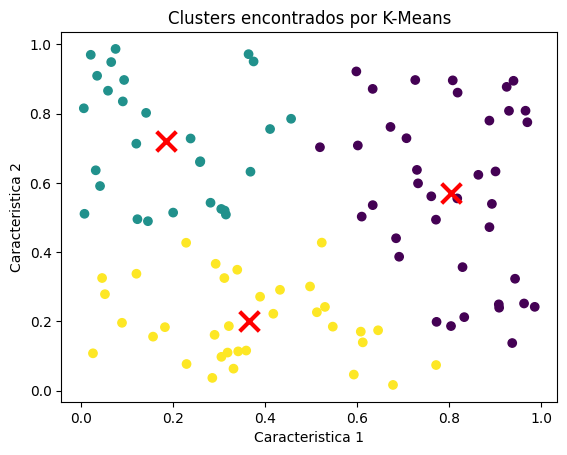

In [ ]:
#Implementacion de K-Means:
from sklearn.cluster import KMeans

#Generar datos aleatorios pra clustering
np.random.seed(42)
X = np.random.rand(100, 2)

#Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

#Visualizar los clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title('Clusters encontrados por K-Means')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


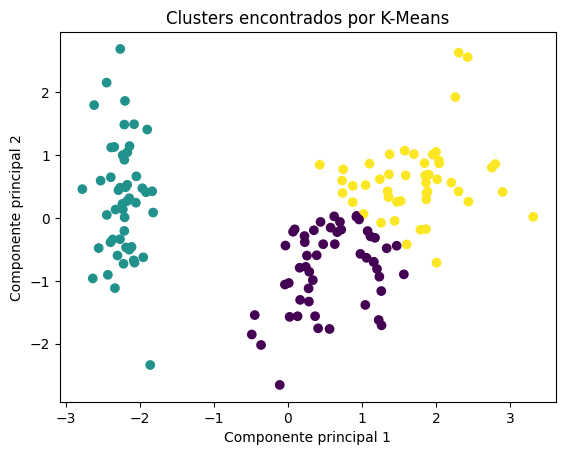

In [ ]:
#aplicacion de clustering en un conjunto de datos
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Cargar conjunto de datos de  IRIS
iris = load_iris()
X = iris.data
y = iris.target

#normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

#Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters encontrados por K-Means')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

## Agrupamiento Jerárquico
 El agrupamiento jerárquico es un enfoque de agrupamiento en el que los
 datos se organizan en una estructura jerárquica de clusters. Este método no
 requiere que se especifique el número de clusters de antemano y puede
 representarse como un árbol o dendrograma. Hay dos enfoques principales
 en el agrupamiento jerárquico:

### Métodos de enlace
 Los métodos de enlace determinan cómo se calcula la
 distancia entre clusters. El método single-linkage considera
 la distancia mínima entre los puntos de los clusters. El
 complete-linkage considera la distancia máxima. El
 average-linkage considera el promedio de las distancias.

###  Visualización de dendrogramas y selección del número de clusters
 Los dendrogramas son representaciones
 gráficas de la jerarquía de clusters generados
 durante el agrupamiento jerárquico. Permiten
 visualizar la estructura jerárquica y facilitan la
 selección del número óptimo de clusters al
 observar la altura a la que se realizan las
 fusiones en el dendrograma.

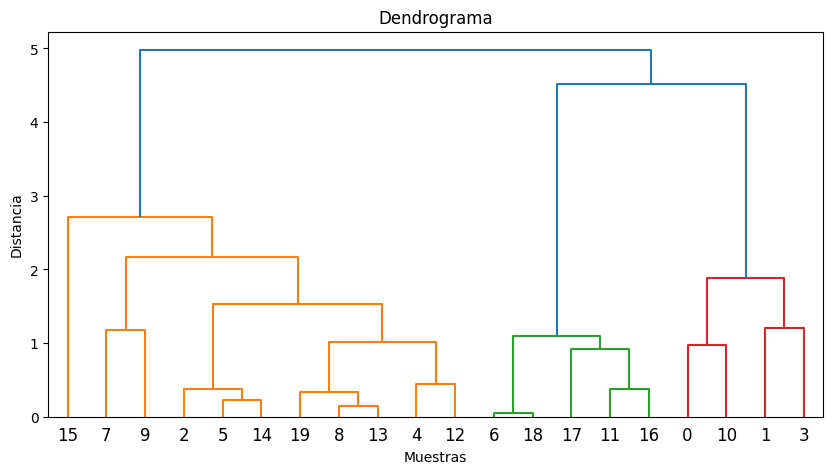

In [ ]:
# Visualización de dendrogramas
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#generar datos aleatorio
np.random.seed(42)
X = np.random.randn(20,2)

#calcular la matriz de enlace
Z = linkage(X, method='ward')

#dibujar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()

clusters [1 1 0 1 0 0 2 0 0 0 1 2 0 0 0 0 2 2 2 0]


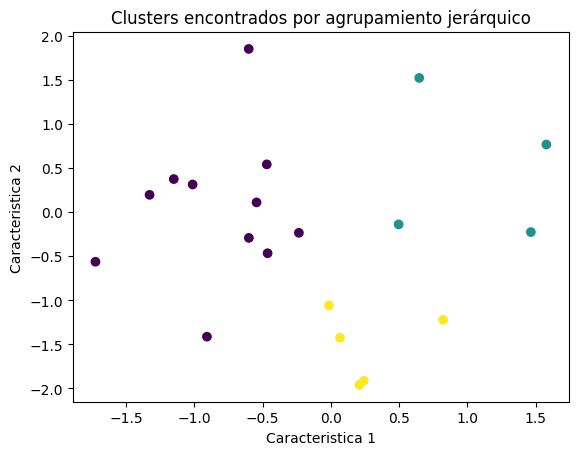

In [ ]:
#Implementación de agrupamiento jerárquico

from sklearn.cluster import AgglomerativeClustering

#generar datos aleatorios
np.random.seed(42)
X = np.random.randn(20, 2)

#crear una distancia del modelo de agrupamiento
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

#ajustar el modelo a los datos
cluster = model.fit_predict(X)

#imprimir los resultados
print("clusters", cluster)

#visualizar los clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster, cmap='viridis')
plt.title("Clusters encontrados por agrupamiento jerárquico")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")
plt.show()

## DBSCAN (Density-Base Spatial Clustering of Applications with Noise)
 Es un algoritmo de agrupamiento que se basa en la densidad de los puntos
 en el espacio de características. Su funcionamiento se centra en la
 identificación de regiones de alta densidad, que se consideran como
 clusters, separados por regiones de baja densidad. Para ello, utiliza dos
 parámetros clave:
###  epsilon (ε)                  
 Especifica la distancia
 máxima entre dos puntos
 para que se consideren
 vecinos.

### minPts
Establece el número mínimo
 de puntos dentro de un
 vecindario para que un punto
 se considere central.

In [ ]:
# Implementación de DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

def custom_dbscan(data, eps, min_samples):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  clusters = dbscan.fit_predict(data)
  return clusters


### Identificación de Puntos
 Dado un conjunto de datos y los resultados del agrupamiento utilizando
 DBSCAN, escribe una función para identificar y contar el número de puntos
 centrales, puntos de frontera y puntos de ruido.

In [ ]:
def identify_points(data, clusters):
  unique_clusters = set(clusters)
  core_points = sum([1 for i in range(len(clusters)) if clusters[i] != -1])
  border_points =  sum([1 for i in range(len(clusters)) if clusters[i] == -1])
  noise_points = sum([1 for i in range(len(clusters)) if clusters[i] == 0])
  return core_points, border_points, noise_points

#Ejemplo de uso
cluster = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, -1, -1, -1]
core_points, border_points, noise_points = identify_points(X, cluster)
print("Puntos centrales: ", core_points)
print("Puntos de frontera: ", border_points)
print("Puntos de ruido: ", noise_points)


Puntos centrales:  12
Puntos de frontera:  3
Puntos de ruido:  3


###  Ejemplo de Aplicación
Utiliza DBSCAN para agrupar un conjunto de datos sintéticos y visualiza los
 resultados utilizando un gráfico de dispersión.



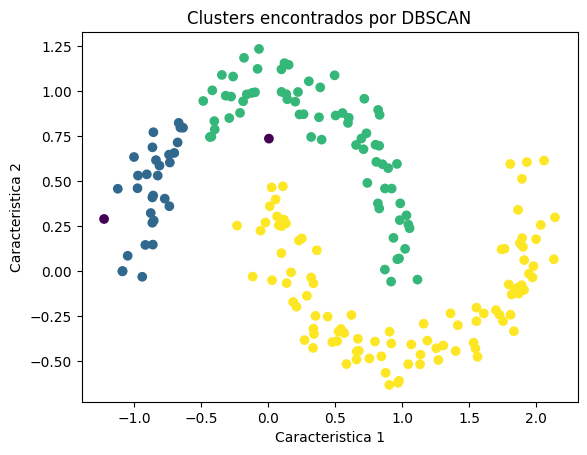

In [ ]:
from sklearn.datasets import make_moons

#generar datos sintéticos
np.random.seed(42)
X, _ = make_moons(n_samples=200, noise=0.1)

#aplicar DBSCAN
epsilon = 0.2
minPts = 5
clusters = custom_dbscan(X, epsilon, minPts)

#identificar los puntos centrales, puntos de frontera y puntos de ruido
core_points, border_points, noise_points = identify_points(X, clusters,)

#visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters encontrados por DBSCAN")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")
plt.show()


## Mean Shift

 Mean Shift es un algoritmo de agrupamiento no
 paramétrico que busca los modos de densidad en
 un conjunto de datos para encontrar los centroides
 de los clusters. Funciona mediante la definición de
 una función de densidad de probabilidad y moviendo
 iterativamente los puntos de datos hacia las
 regiones de mayor densidad. Esto permite que el
 algoritmo encuentre automáticamente el número de
 clusters y su forma sin necesidad de especificarlos
 de antemano.

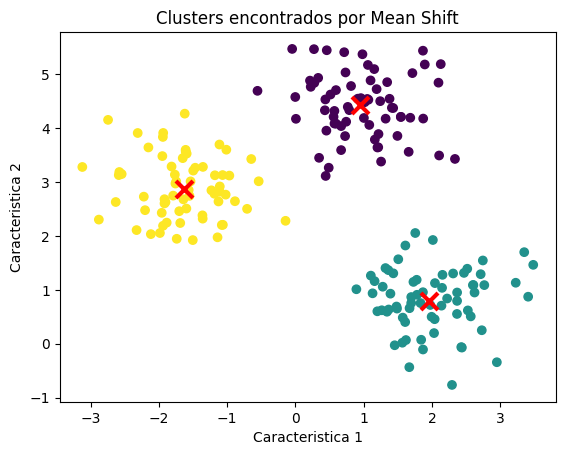

In [ ]:
#implementacion de  Mean Shift
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

#generar datos sintéticos
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.6, random_state=0)

#Aplicar Mean Shift
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

#visualizar el modelo
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=150, linewidths=3, color='red')
plt.title("Clusters encontrados por Mean Shift")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")
plt.show()

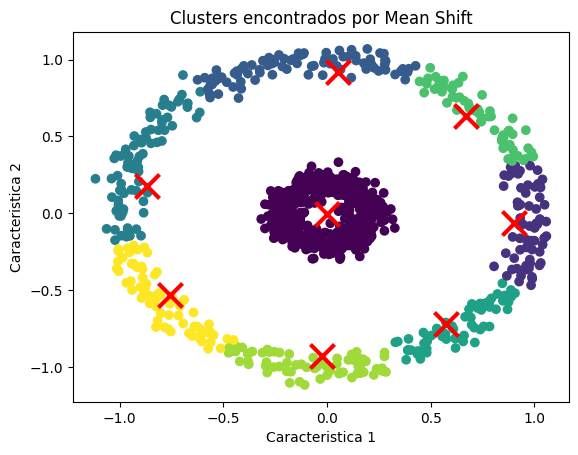

In [ ]:
#ejemplo de uso de datos de agrupamiento
from sklearn.datasets import make_circles

#generar datos ficticios en forma de anillo concentrico
X, _ = make_circles(n_samples=1000, noise=0.05, random_state=42, factor=0.2)

#Aplicar Mean Shift
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

#visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, linewidths=3, color='red')
plt.title("Clusters encontrados por Mean Shift")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")
plt.show()

## Gaussian Mixture Models (GMM) y Spectral Clustering
Mean Shift es un algoritmo de agrupamiento no
 paramétrico que busca los modos de densidad en
 un conjunto de datos para encontrar los centroides
 de los clusters. Funciona mediante la definición de
 una función de densidad de probabilidad y moviendo
 iterativamente los puntos de datos hacia las
 regiones de mayor densidad. Esto permite que el
 algoritmo encuentre automáticamente el número de
 clusters y su forma sin necesidad de especificarlos
 de antemano

### Modelos de mezclas gaussianas (GMM) y su relación con el agrupamiento

Los modelos de mezclas gaussianas son un enfoque probabilístico para el
 agrupamiento de datos. En GMM, se asume que los datos provienen de una
 mezcla de varias distribuciones gaussianas y se busca estimar los
 parámetros de estas distribuciones para modelar la estructura de los datos.
 GMM es útil cuando los datos no se agrupan claramente en grupos distintos
 y cuando los grupos pueden tener formas y tamaños diferentes.

### Introducción a GMM

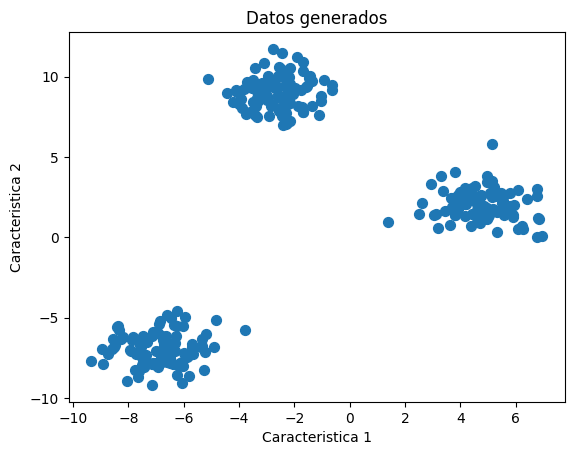

In [ ]:
#generacion de datos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#generar datos sinteticos con 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

#visualizar los datos
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos generados")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

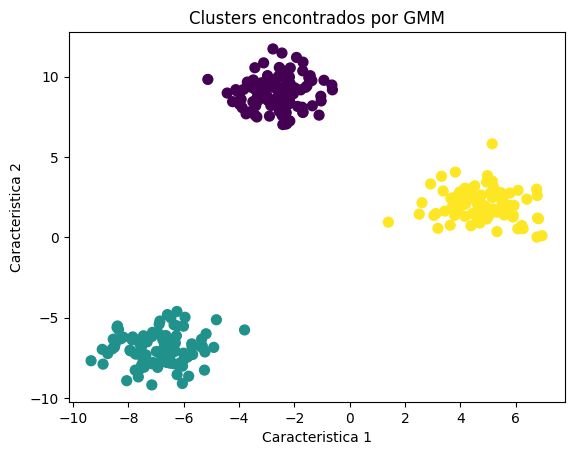

In [ ]:
# Ajuste del modelo GMM
from sklearn.mixture import GaussianMixture

#crear y ajustar el modelo GMM con 3 componentes
gmm = GaussianMixture(n_components=3, random_state=42)

#ajustar el modelo de datos
gmm.fit(X)

#Obtener la estiqueta  de cluster para  cada punto de datos
labels = gmm.predict(X)

#visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Clusters encontrados por GMM")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")
plt

### Introducción a Spectral Clustering

Text(0, 0.5, 'Caracteristica 2')

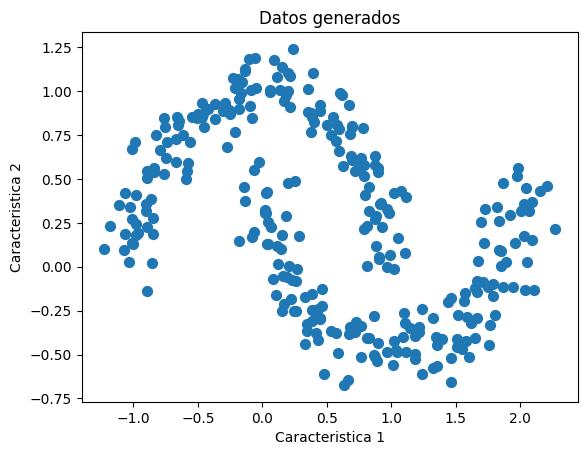

In [ ]:
#generacion de datos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

#generar datos sintéticos en forma de luna
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

#visualizar los datos
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos generados")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")

[1 2 1 0 2 2 1 3 0 1 2 0 1 0 1 1 2 1 3 1 1 3 2 2 3 0 2 2 1 2 0 1 0 0 1 3 0
 1 0 1 3 1 2 0 1 0 2 2 3 2 1 3 2 0 2 2 3 3 1 0 2 0 0 1 1 0 0 2 0 1 3 3 2 1
 3 2 1 1 0 2 1 1 0 3 1 3 3 1 0 0 1 1 0 2 0 0 1 3 2 0 2 0 0 1 2 2 3 0 1 1 3
 2 1 2 2 3 3 2 1 1 0 1 1 1 3 2 0 3 1 2 3 3 1 3 2 2 1 1 1 0 3 3 1 3 1 2 3 1
 0 1 2 3 1 1 2 2 2 0 1 1 1 1 0 0 0 3 2 2 1 0 3 1 2 0 1 2 3 0 2 3 1 0 2 2 3
 2 2 1 3 0 0 1 2 1 2 0 2 2 0 1 0 3 0 1 1 1 2 3 0 3 3 2 0 0 2 0 0 2 1 0 3 2
 1 1 0 2 3 1 1 1 0 2 2 2 1 0 0 3 2 2 2 1 1 0 1 3 1 1 2 0 3 0 3 0 3 3 0 1 1
 0 1 0 2 0 1 1 2 3 2 2 0 0 1 1 2 1 1 0 0 2 2 0 1 2 1 2 3 3 1 3 1 1 3 2 0 1
 0 3 2 3]


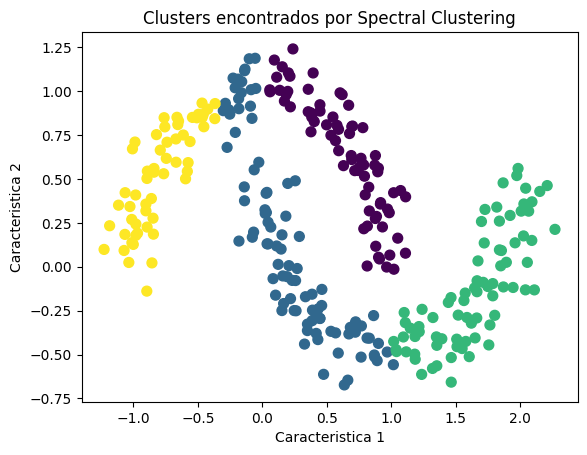

In [ ]:
#Ajust del modelo Spectral Clustering
from sklearn.cluster import SpectralClustering

#crear y ajustar el modelo Spectral Clustering con dos clusters
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)

#ajustar el modelo a los datos
sc.fit(X)

#obtener las etiquetas de cluster para cada punto de datos
labels = sc.labels_
print(labels)

#visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Clusters encontrados por Spectral Clustering")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")
plt.show()





###  Comparación entre GMM y Spectral Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


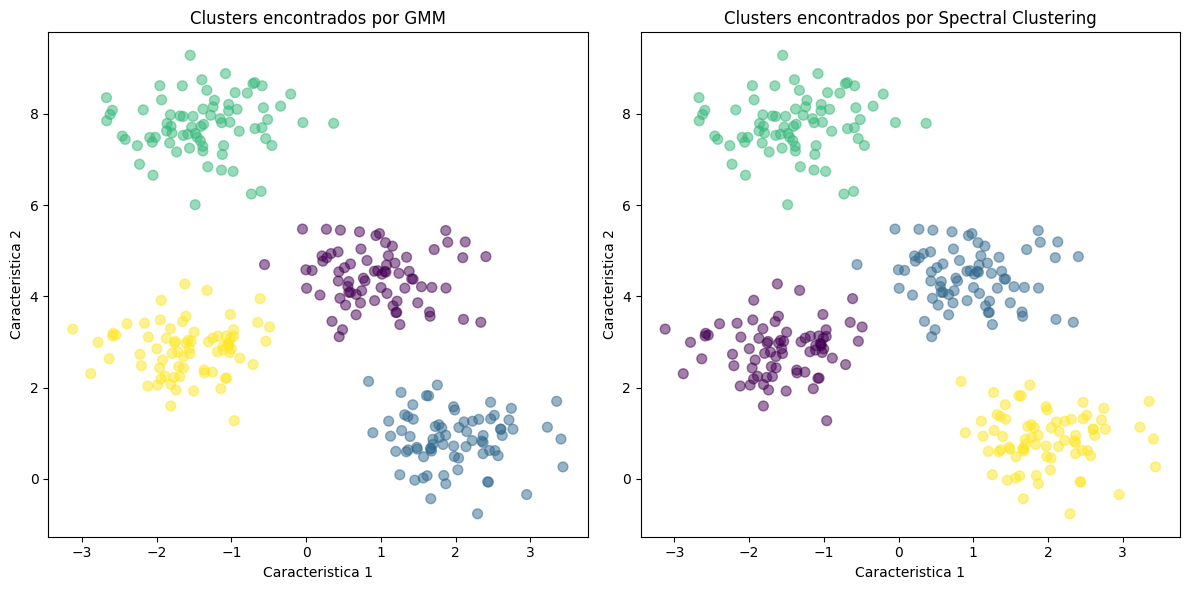

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

#generar datos sinteticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#Ajustar modelo GMM
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)
gmm_labels = gmm.predict(X)

#Ajustar modelo Spectral Clustering
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)
sc.fit(X)
sc_labels = sc.labels_

#comparacion visual de GMM y Spectral Clustering  en los mismos datos
plt.figure(figsize=(12, 6))

#GMM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, s=50, cmap='viridis', alpha=0.5)
plt.title("Clusters encontrados por GMM")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")

#Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sc_labels, s=50, cmap='viridis', alpha=0.5)
plt.title("Clusters encontrados por Spectral Clustering")
plt.xlabel("Caracteristica 1")
plt.ylabel("Caracteristica 2")

plt.tight_layout()
plt.show()